## 01| Dataset Information

Kasus kali ini kita akan mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

#### Informasi dataset:
- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

## 02| Understanding and Profiling Data

In [49]:
#Import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# Read File
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

data terdiri dari 167 baris dan 10 kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#Melihat missing value
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Tidak ada missing value dari data

In [6]:
#Melihat data duplikat
df.duplicated().any()

False

Tidak ada data duplikat dari data

In [7]:
#Melihat ringkasan statistik deskriptif
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Kita ambil salah satu kolom,yaitu kolom 'Kematian_anak'. Dari  kolom bisa dilihat jika rata2 lebih besar dari nilai tengah atau mediannya. maka data akan cenderung skew kekanan yg menunjukkan bahwa data memiliki outlier.

## 03| Exploratory Data Analysis (EDA)

Kasus kali ini kita akan mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

#### Informasi dataset:
- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

#### Fokus masalah

Pada kasus ini, fokus kita adalah melihat negara dari segi ekonomi dan kesehatan agar bantuan dapat tersalurkan dengan sangat baik. Saya akan memisahkan aspek2 ekonomi dan kesehatan sebagai berikut:
1. Aspek ekonomi ('Ekspor','Impor','Pendapatan','Inflansi','GDPperkapita')
2. Aspek kesehatan ('Kematian_anak','Kesehatan','Harapan_hidup','Jumlah_fertiliti')

#### a. Aspek kesehatan

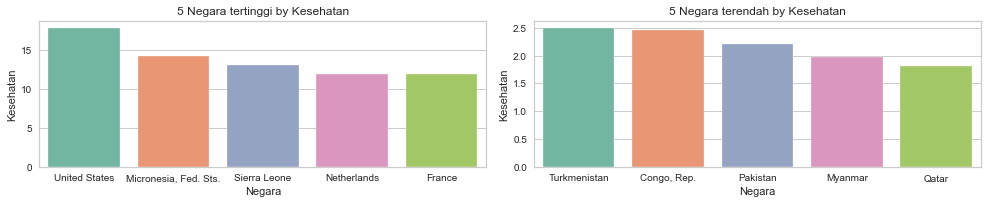

In [8]:
df_kesehatan = df.sort_values(by='Kesehatan', ascending=False)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df_kesehatan.Negara.head(),df_kesehatan.Kesehatan, palette='Set2')
plt.title('5 Negara tertinggi by Kesehatan')
plt.subplot(1,2,2)
sns.barplot(df_kesehatan.Negara.tail(),df_kesehatan.Kesehatan, palette='Set2')
plt.title('5 Negara terendah by Kesehatan')
plt.tight_layout()
plt.show()

Negara dengan tingkat pengeluaran untuk kesehatan tertinggi adalah United States, sedangkan paling rendah ialah Turkmenistan

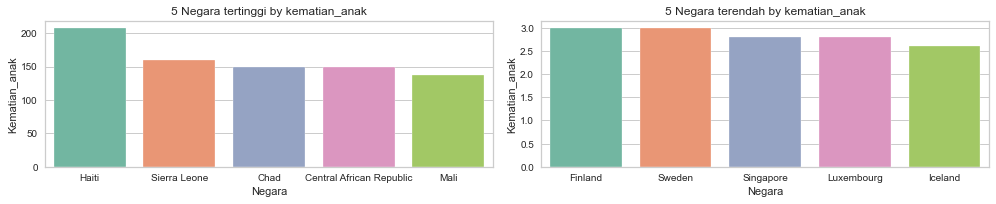

In [9]:
df_kematian = df.sort_values(by='Kematian_anak', ascending=False)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df_kematian.Negara.head(),df_kematian.Kematian_anak, palette='Set2')
plt.title('5 Negara tertinggi by kematian_anak')
plt.subplot(1,2,2)
sns.barplot(df_kematian.Negara.tail(),df_kematian.Kematian_anak, palette='Set2')
plt.title('5 Negara terendah by kematian_anak')
plt.tight_layout()
plt.show()

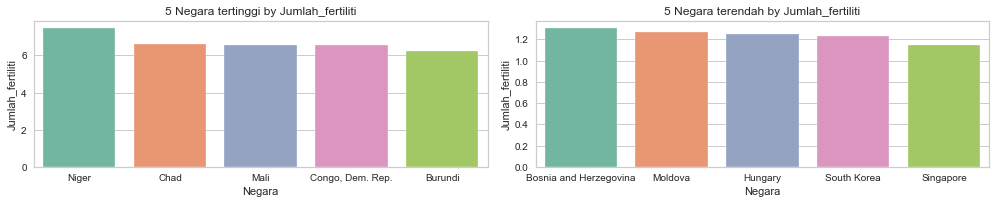

In [10]:
df_fertiliti = df.sort_values(by='Jumlah_fertiliti', ascending=False)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df_fertiliti.Negara.head(),df_fertiliti.Jumlah_fertiliti, palette='Set2')
plt.title('5 Negara tertinggi by Jumlah_fertiliti')
plt.subplot(1,2,2)
sns.barplot(df_fertiliti.Negara.tail(),df_fertiliti.Jumlah_fertiliti, palette='Set2')
plt.title('5 Negara terendah by Jumlah_fertiliti')
plt.tight_layout()
plt.show()

Jika diamati, negara Chad memiliki tingkat kematian dan jumlah fertilit yang tinggi. Coba kita lihat hubungan antara kedua fitur tersebut.

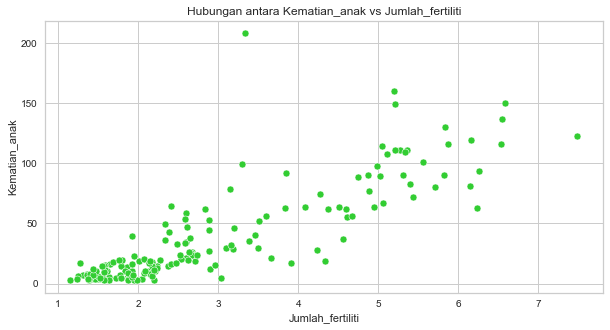

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.Jumlah_fertiliti, df.Kematian_anak, color='limegreen')
plt.title('Hubungan antara Kematian_anak vs Jumlah_fertiliti')
plt.show()

Ternyata semakin besar jumlah_fertiliti yang semakin besar jumlah kematian anak juga semakin besar. Penting, bahwa ini hanya merupakan hubungan kedua fitur bukan merupakan penyebabnya.

#### b. Aspek  ekonomi

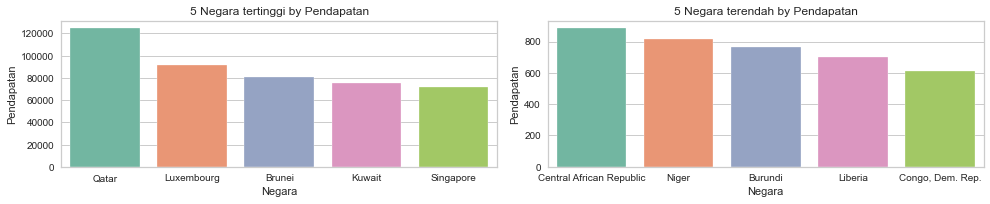

In [12]:
df_Pendapatan = df.sort_values(by='Pendapatan', ascending=False)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df_Pendapatan.Negara.head(),df_Pendapatan.Pendapatan, palette='Set2')
plt.title('5 Negara tertinggi by Pendapatan')
plt.subplot(1,2,2)
sns.barplot(df_Pendapatan.Negara.tail(),df_Pendapatan.Pendapatan, palette='Set2')
plt.title('5 Negara terendah by Pendapatan')
plt.tight_layout()
plt.show()

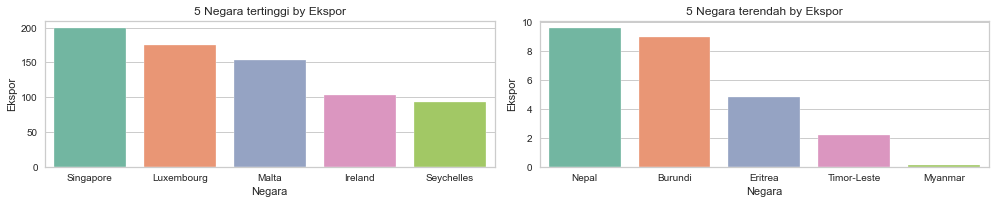

In [13]:
df_Ekspor = df.sort_values(by='Ekspor', ascending=False)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df_Ekspor.Negara.head(),df_Ekspor.Ekspor, palette='Set2')
plt.title('5 Negara tertinggi by Ekspor')
plt.subplot(1,2,2)
sns.barplot(df_Ekspor.Negara.tail(),df_Ekspor.Ekspor, palette='Set2')
plt.title('5 Negara terendah by Ekspor')
plt.tight_layout()
plt.show()

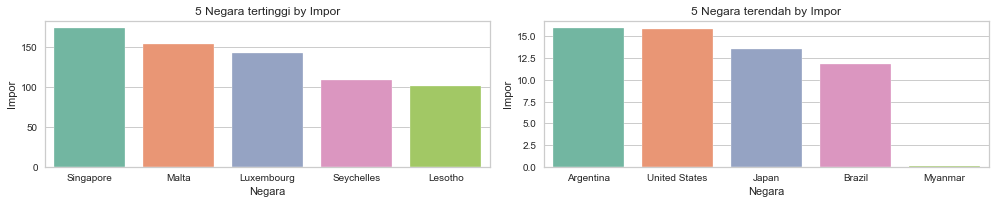

In [14]:
df_Impor = df.sort_values(by='Impor', ascending=False)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df_Impor.Negara.head(),df_Impor.Impor, palette='Set2')
plt.title('5 Negara tertinggi by Impor')
plt.subplot(1,2,2)
sns.barplot(df_Impor.Negara.tail(),df_Impor.Impor, palette='Set2')
plt.title('5 Negara terendah by Impor')
plt.tight_layout()
plt.show()

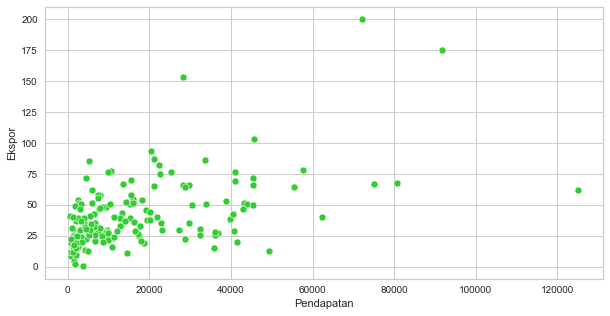

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.Pendapatan, df.Ekspor, color='limegreen')
plt.show('Hubungan antara Pendapatan vs Eskpor')
plt.show()

Ada hubungan yang lumayan kuat antara ekspor dengan pendapatan. Make sense karena mungkin semakin besar suatu negara bisa mengekspor barang maka akan menciptakan lapangan pekerjaan. 

#### c. Kesehatan vs Ekonomi

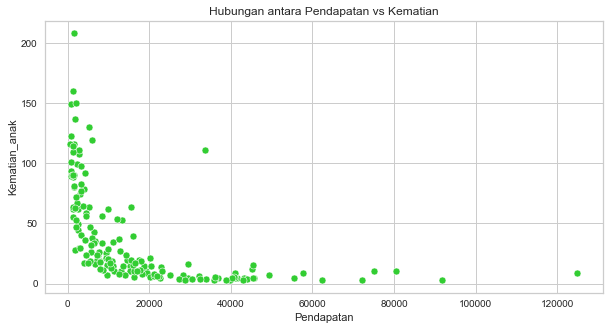

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.Pendapatan, df.Kematian_anak, color='limegreen')
plt.title('Hubungan antara Pendapatan vs Kematian')
plt.show()

In [17]:
#Bining data
df_bin = df[['Pendapatan','Kematian_anak']]
df_bin['Level_pendapatan'] = pd.cut(df.Pendapatan, 
                                    bins=[0, 975, 3855, 11905, 130000], 
                                    labels=['rendah','menengah_bawah','menengah_atas','tinggi'])

#Sumber: https://www.cnnindonesia.com/ekonomi/20200224193851-532-477683/melihat-beda-negara-berkembang-dan-maju-gelar-baru-as-ke-ri

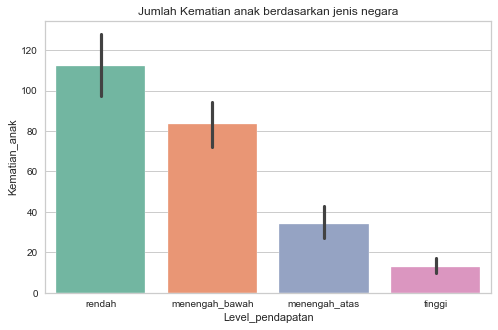

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(df_bin.Level_pendapatan, df_bin.Kematian_anak, palette='Set2')
plt.title('Jumlah Kematian anak berdasarkan jenis negara')
plt.show()

Negara2 yang memiliki pendapatan perkapita tergolong rendah, memiliki tingkat kematian anak yang tinggi juga.

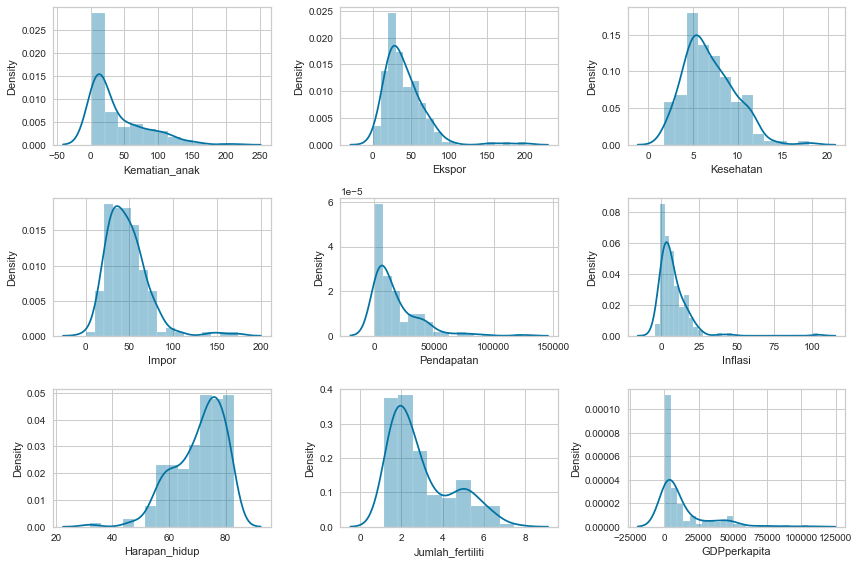

In [19]:
#Melihat distribusi data
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.tight_layout()
plt.show()

Mayoritas data skew kekanan. namun jika dilihat pada fitur 'Harapan_hidup', sebaran data skew kekiri. Outlier menandakan bahwa negara-negara tersebut memiliki harapan hidup yang rendah. 

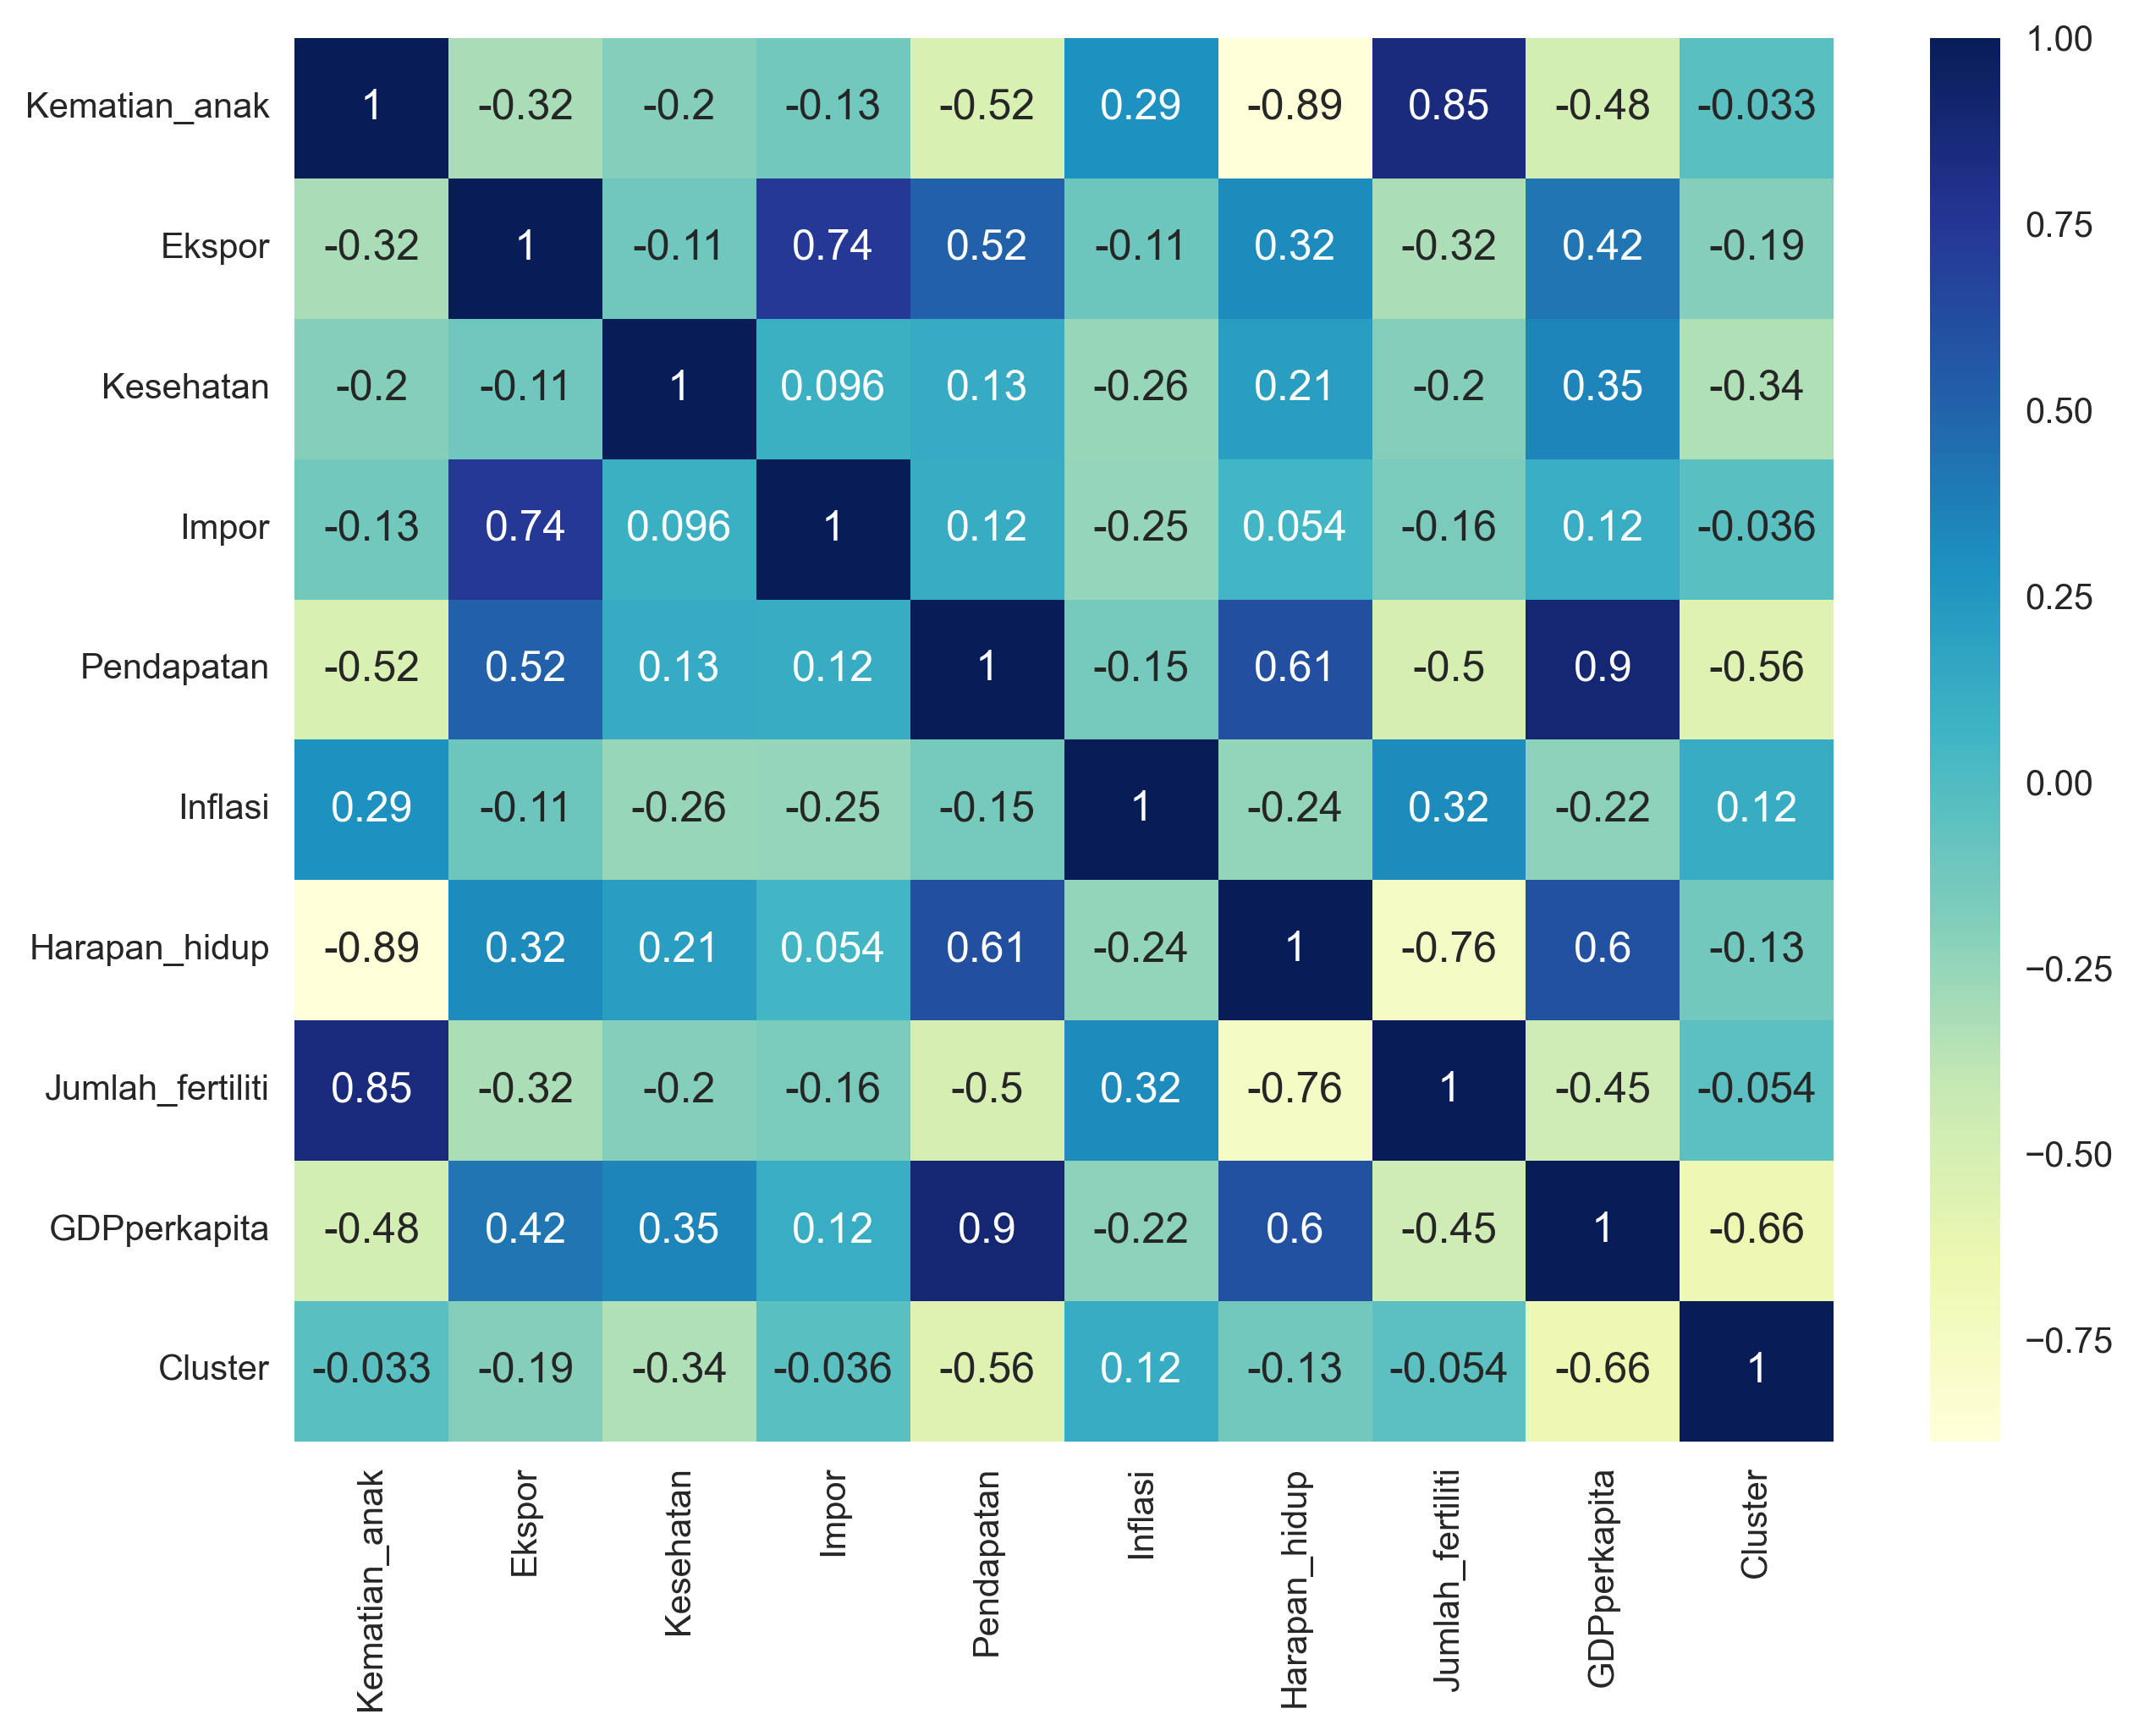

In [63]:
plt.figure(figsize=(9,7))

sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='YlGnBu')

plt.tight_layout()
plt.rcParams['figure.dpi']=300
plt.show()

## 04| Scaling Data

In [21]:
# drop kolom Negara
df2 = df.drop('Negara', axis=1)

In [22]:
# normalisasi data menggunakan fungsi standar scalar dari sklearn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_norm = sc.fit_transform(df2)
df_norm

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## 05| Modeling

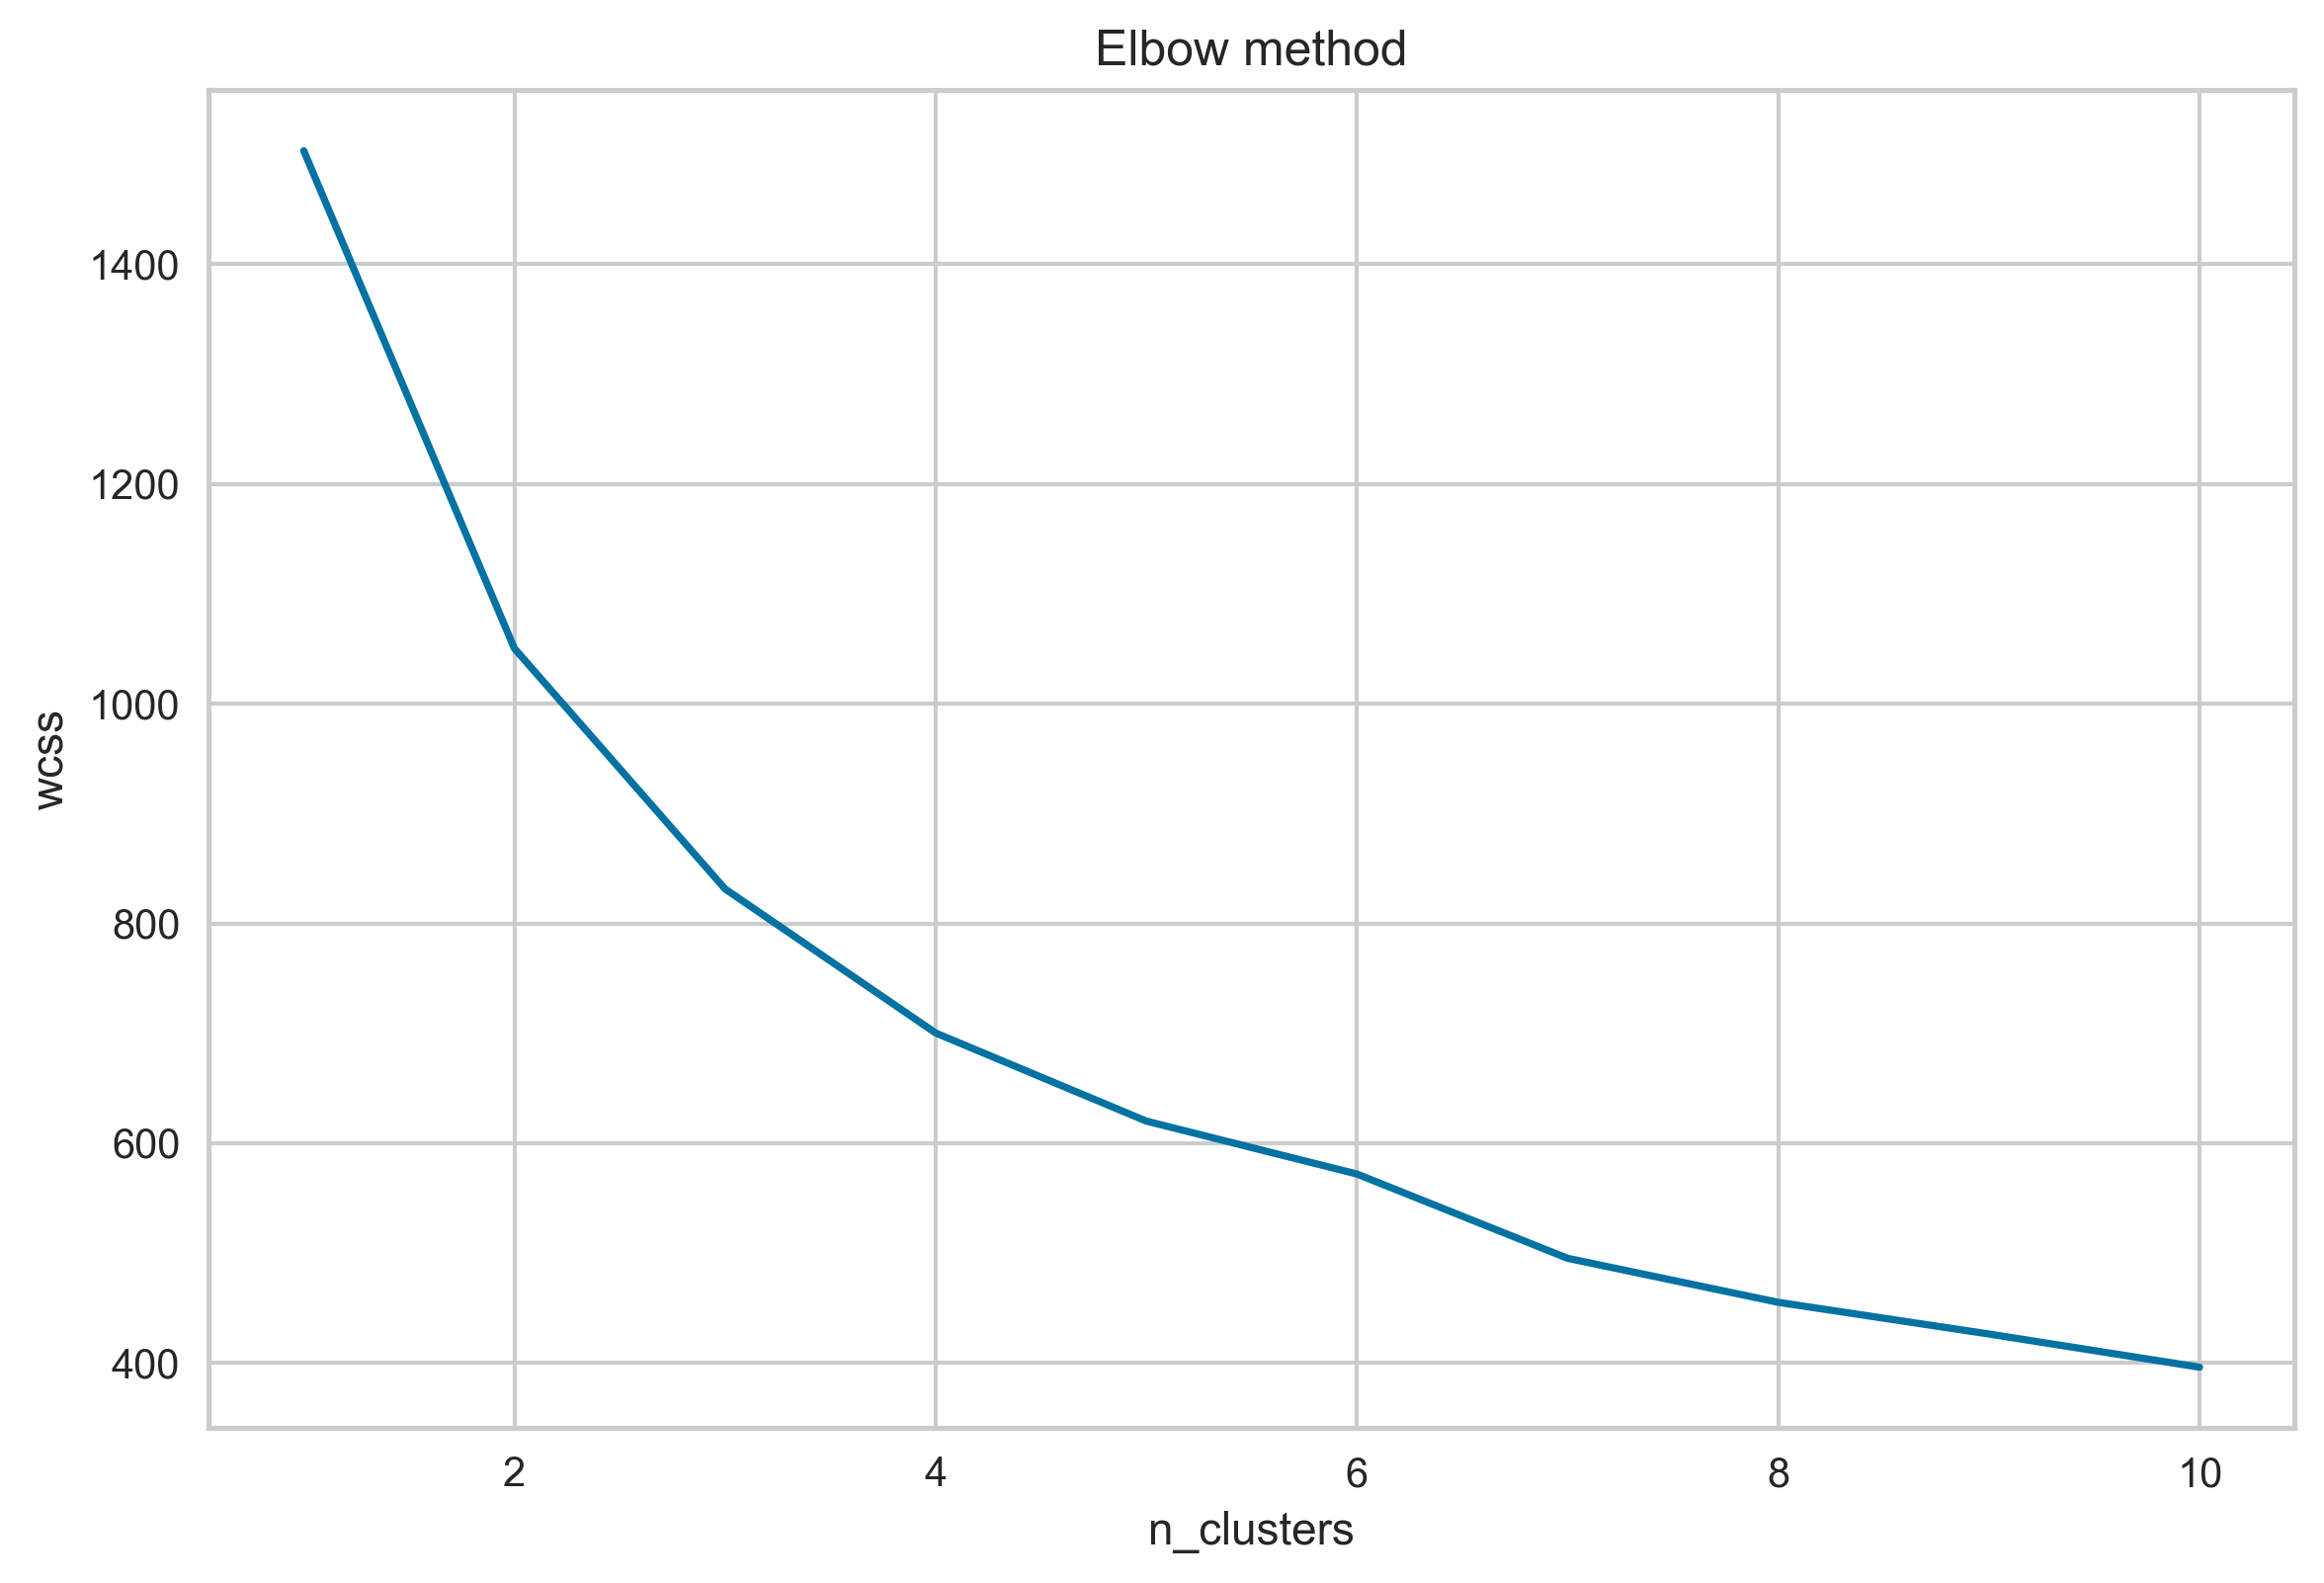

In [23]:
from sklearn.cluster import KMeans

# Untuk mengetahui rekomendasi number dari cluster (3)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.tight_layout()
plt.show()

Dari grafik Elbow, kita bisa menggunakan cluster sebanyak 3. Kemudian kita train model dengan cluster = 3

In [24]:
#Training Data
k_means = KMeans(init = "k-means++", n_clusters = 3, random_state=42)
k_means.fit(df_norm)

KMeans(n_clusters=3, random_state=42)

In [25]:
# Menampilkan label klaster
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [26]:
#Menambahkan Kolom cluster
df['Cluster'] = k_means_labels
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [27]:
# Melihat jumlah data disetiap klaster
df.Cluster.value_counts()

2    84
1    47
0    36
Name: Cluster, dtype: int64

## 06| Insight

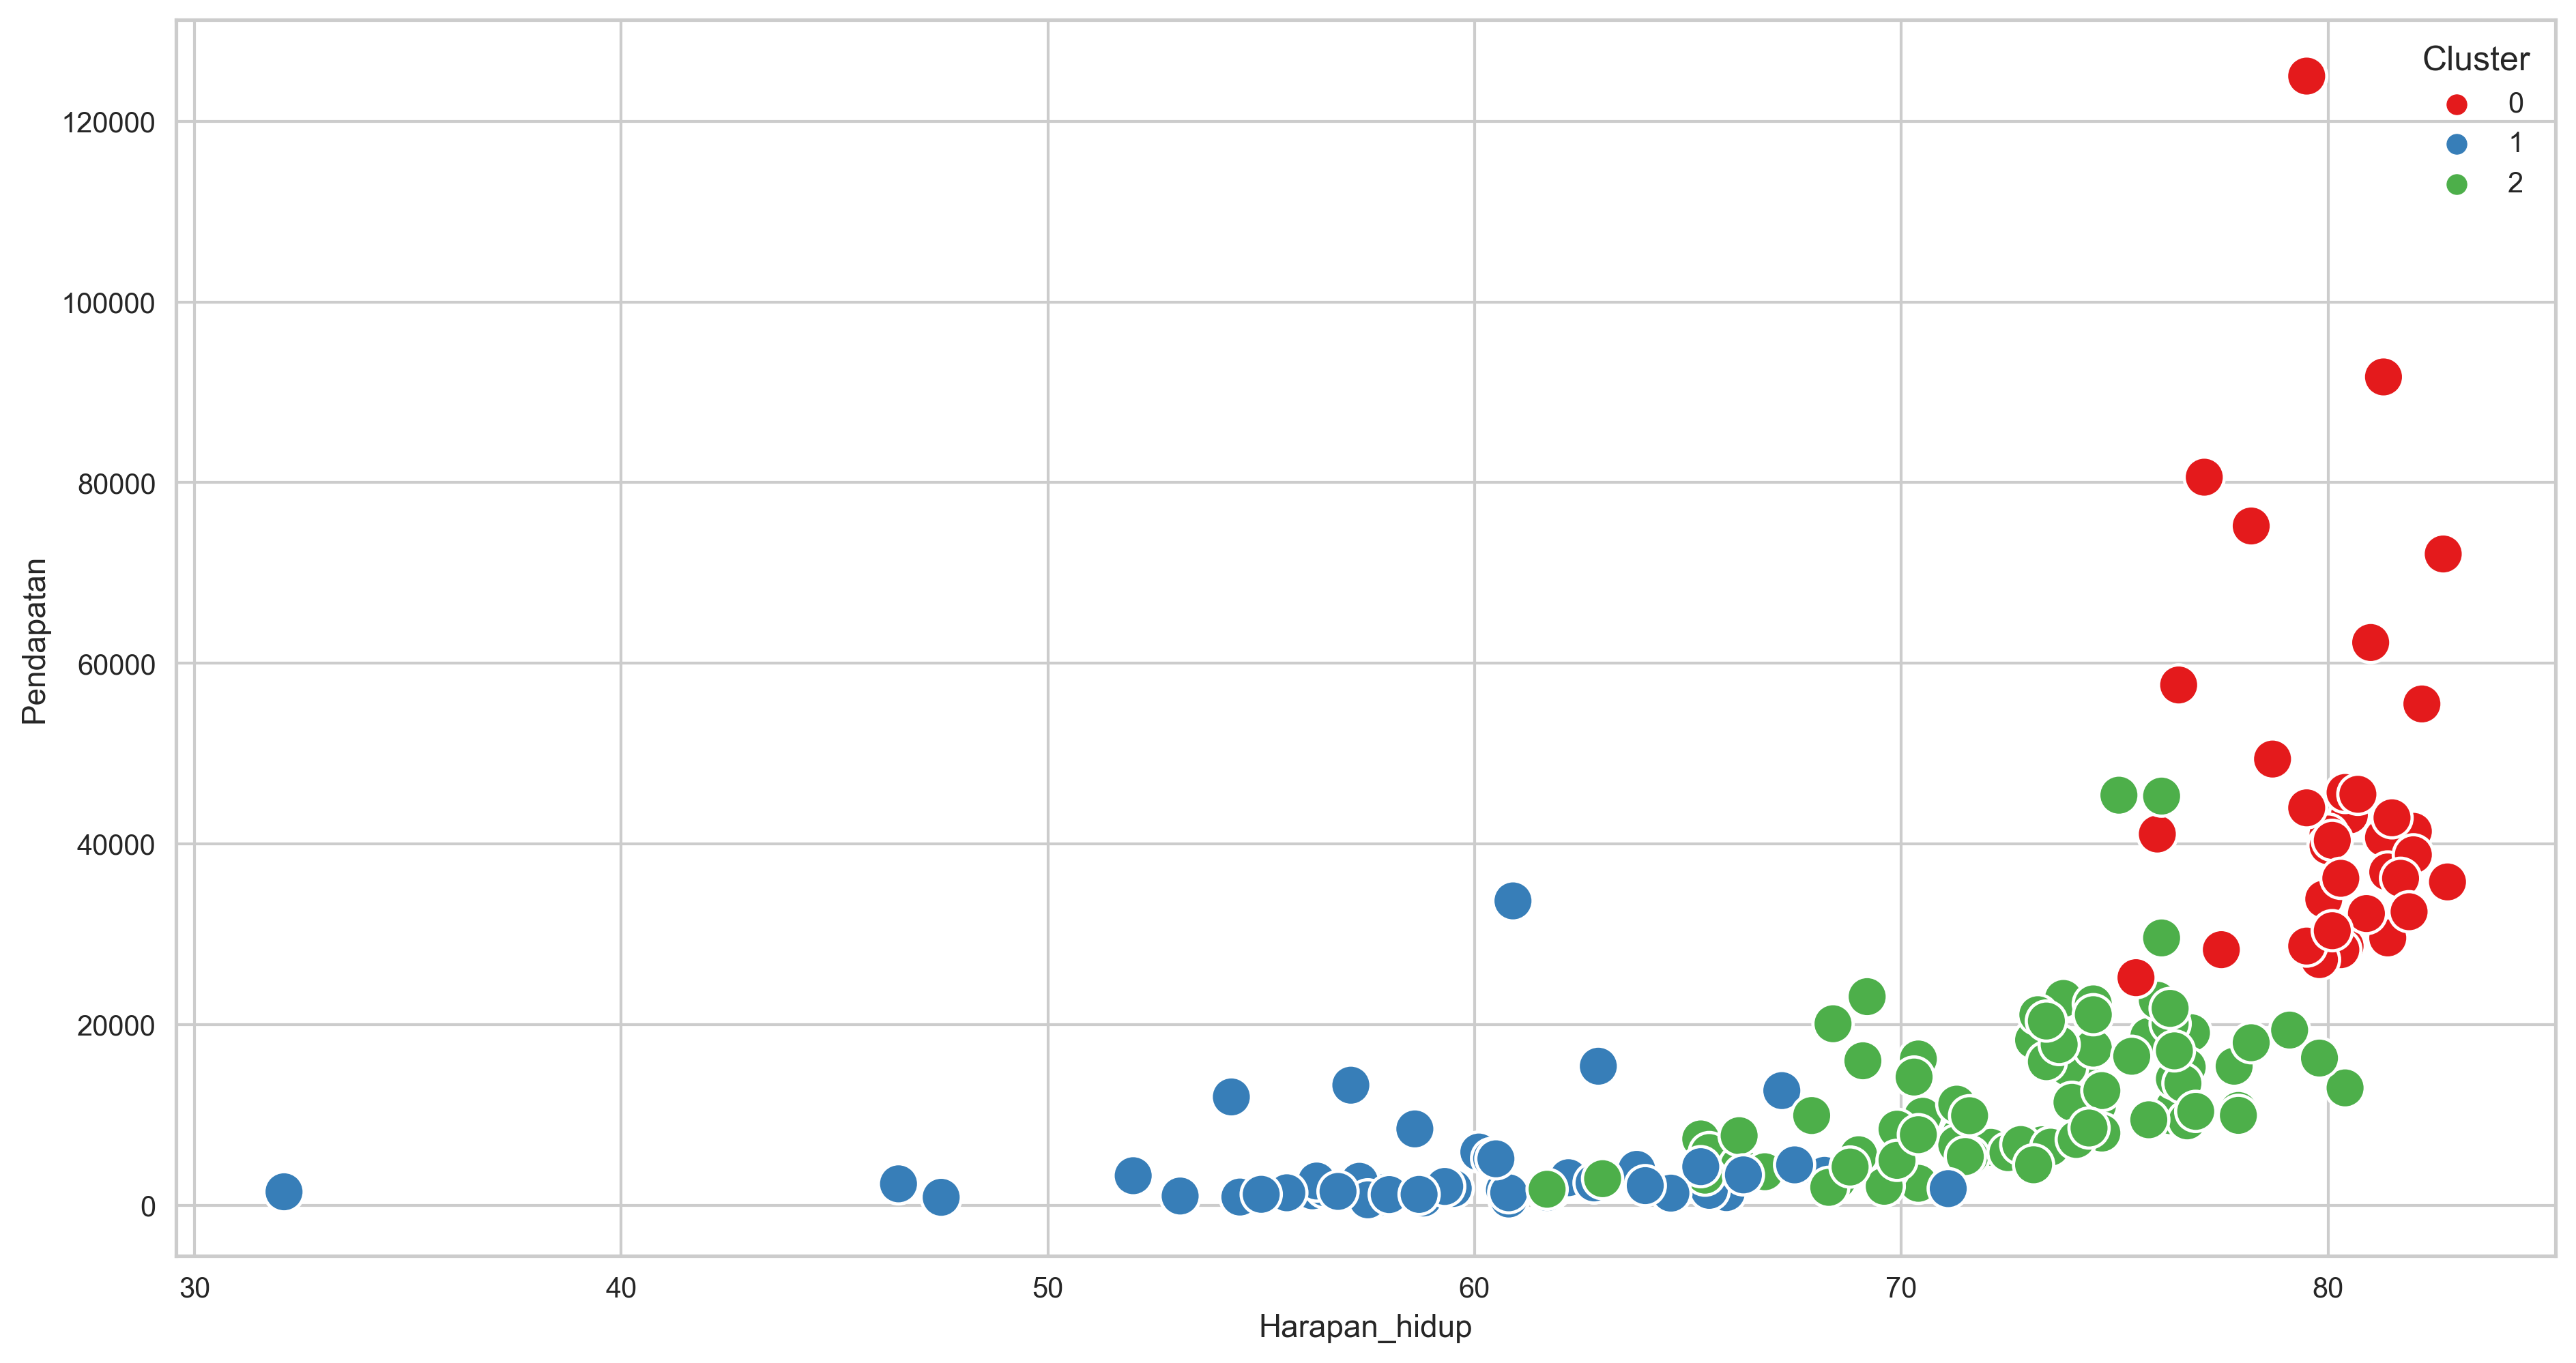

In [48]:
# visualisasi klaster
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Harapan_hidup', y='Pendapatan', hue='Cluster', s=200, palette='Set1' )
plt.xlabel('Harapan_hidup')
plt.ylabel('Pendapatan')
plt.show()

- Cluster 0 'merah' (Negara dengan pendapatan tinggi dan Harapan_hidup tinggi)
- Cluster 1 'biru' (Negara dengan pendapatan rendah dan Harapan_hidup rendah)
- Cluster 2 'hijau' (Negara dengan pendapatan sedang dan Harapan_hidup sedang-tinggi)

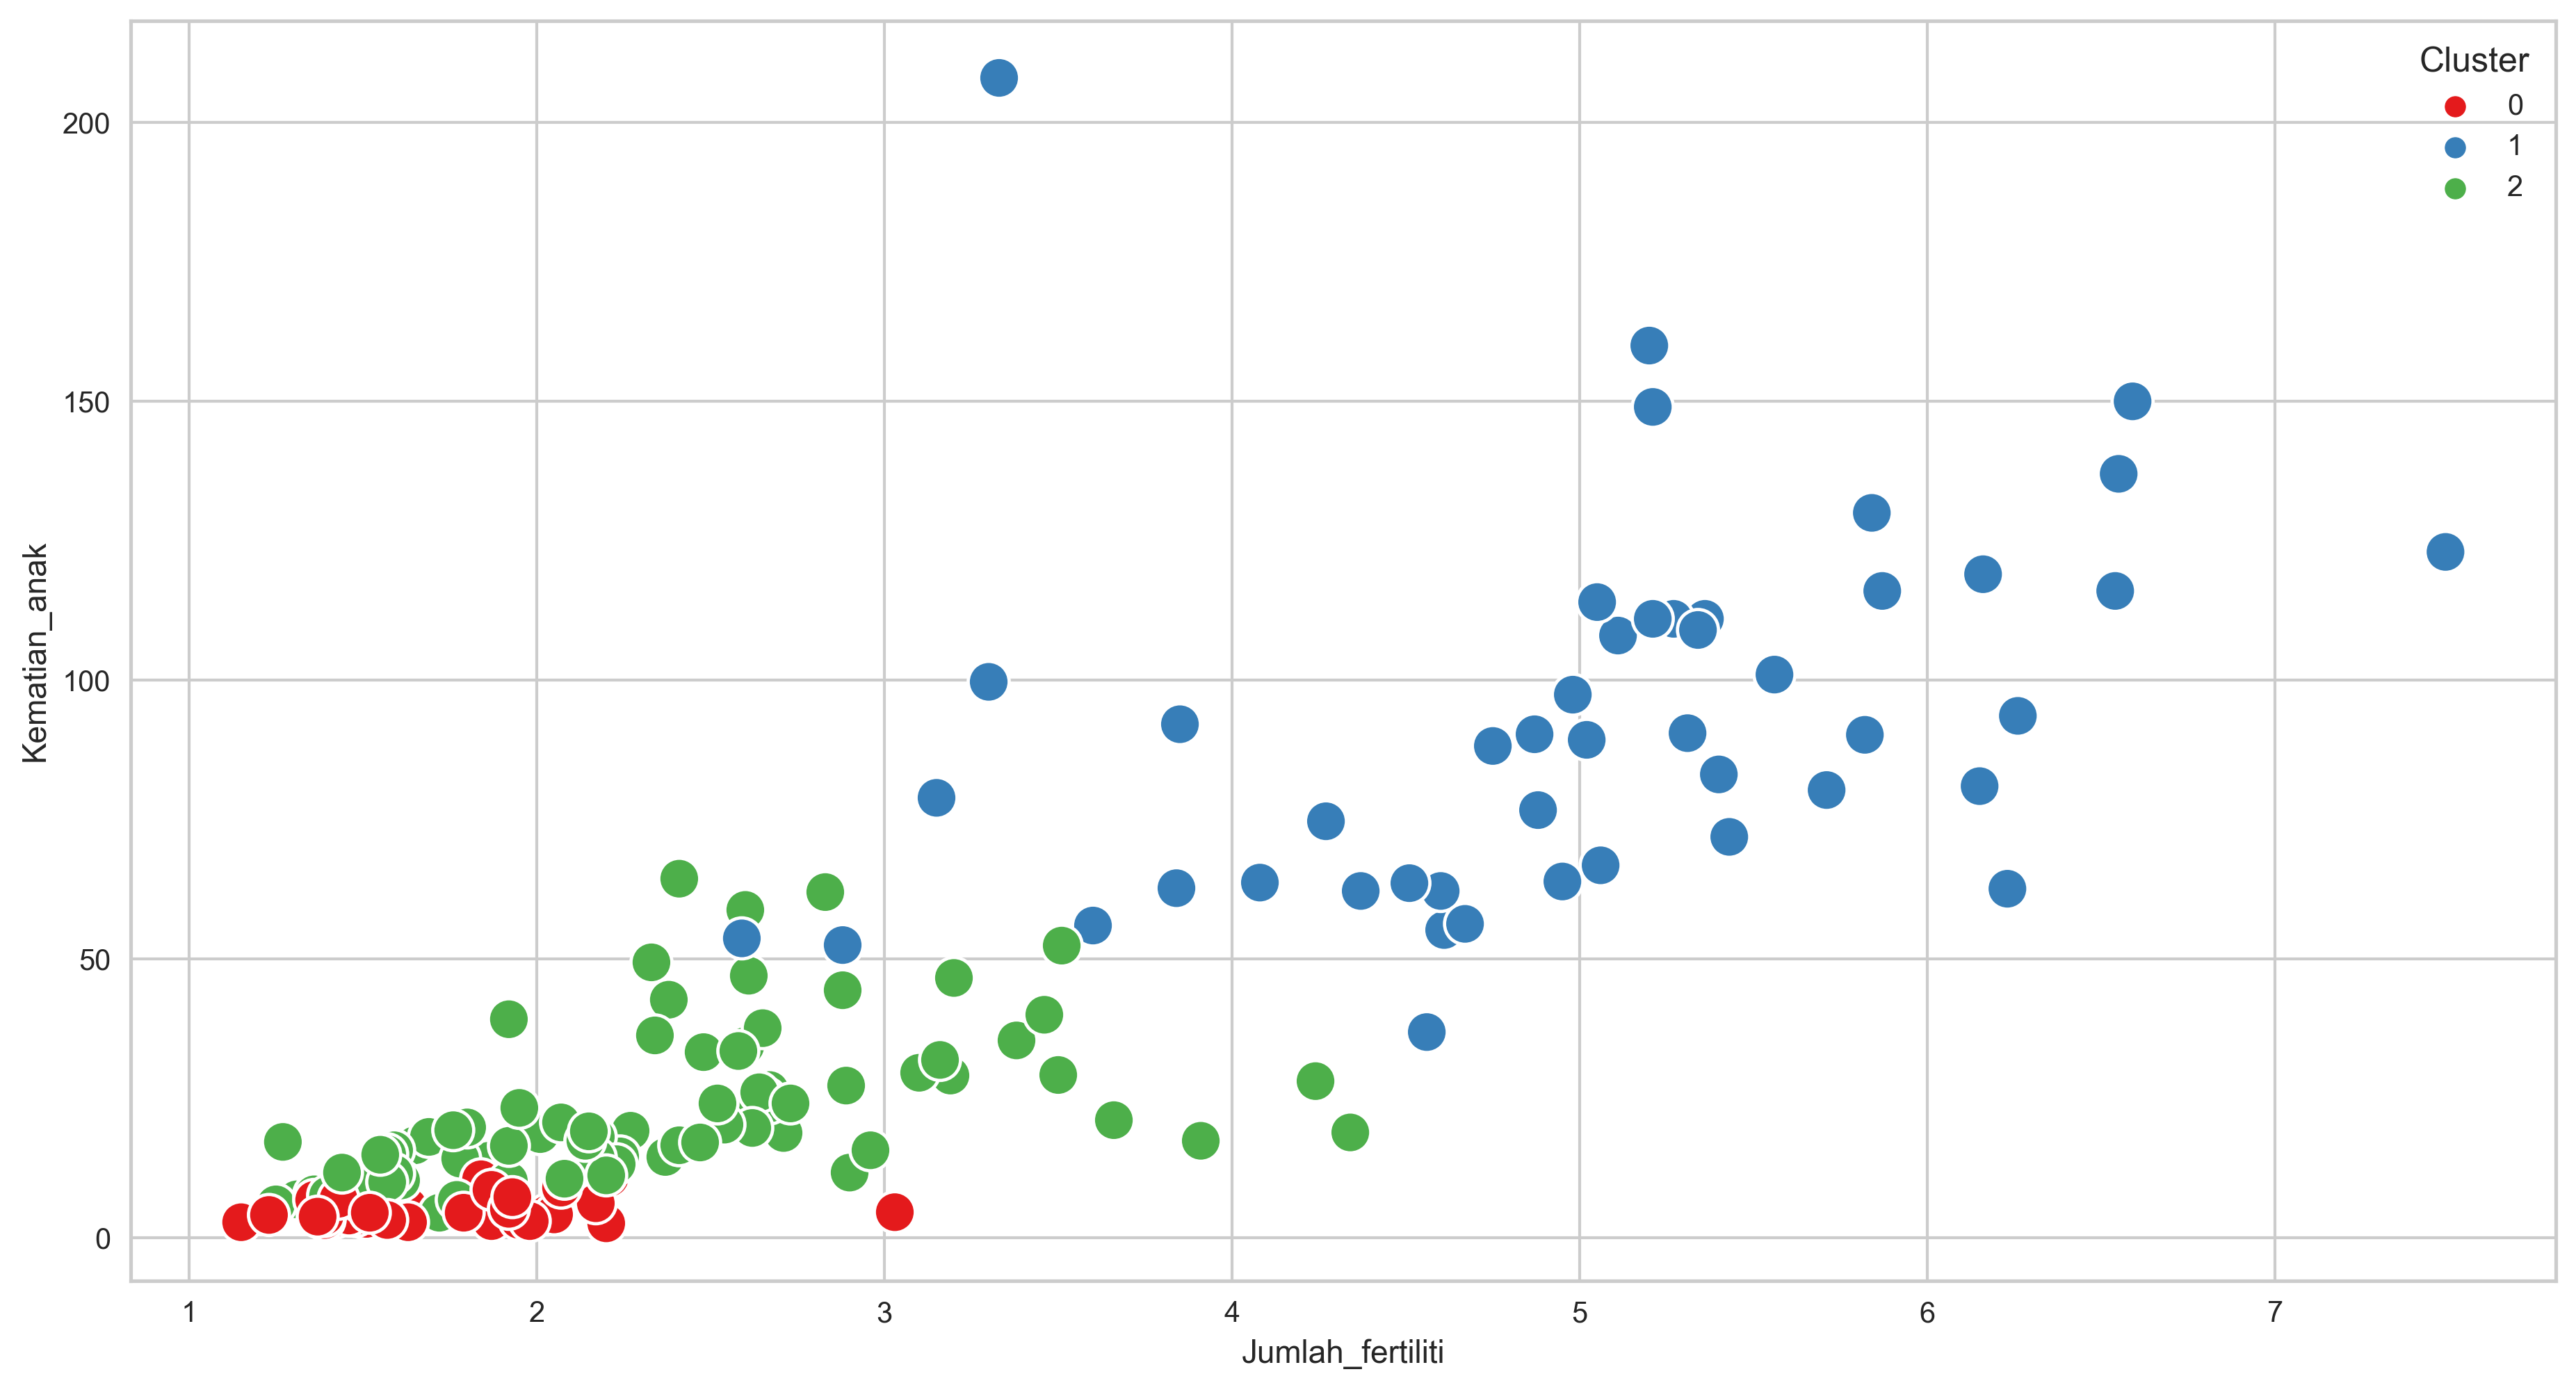

In [30]:
# visualisasi klaster
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Jumlah_fertiliti', y='Kematian_anak', hue='Cluster', s=200, palette='Set1' )
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.show()

- Cluster 0 'merah'(Negara dengan Jumlah_fertiliti rendah dan kematian_anak rendah)
- Cluster 1 'biru' (Negara dengan Jumlah_fertiliti tinggi dan kematian_anak tinggi)
- Cluster 2 'hijau' (Negara dengan Jumlah_fertiliti sedang dan kematian_anak sedang)

In [28]:
# Groupby berdasarkan cluster dan aggregat = mean
df.groupby('Cluster').mean()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


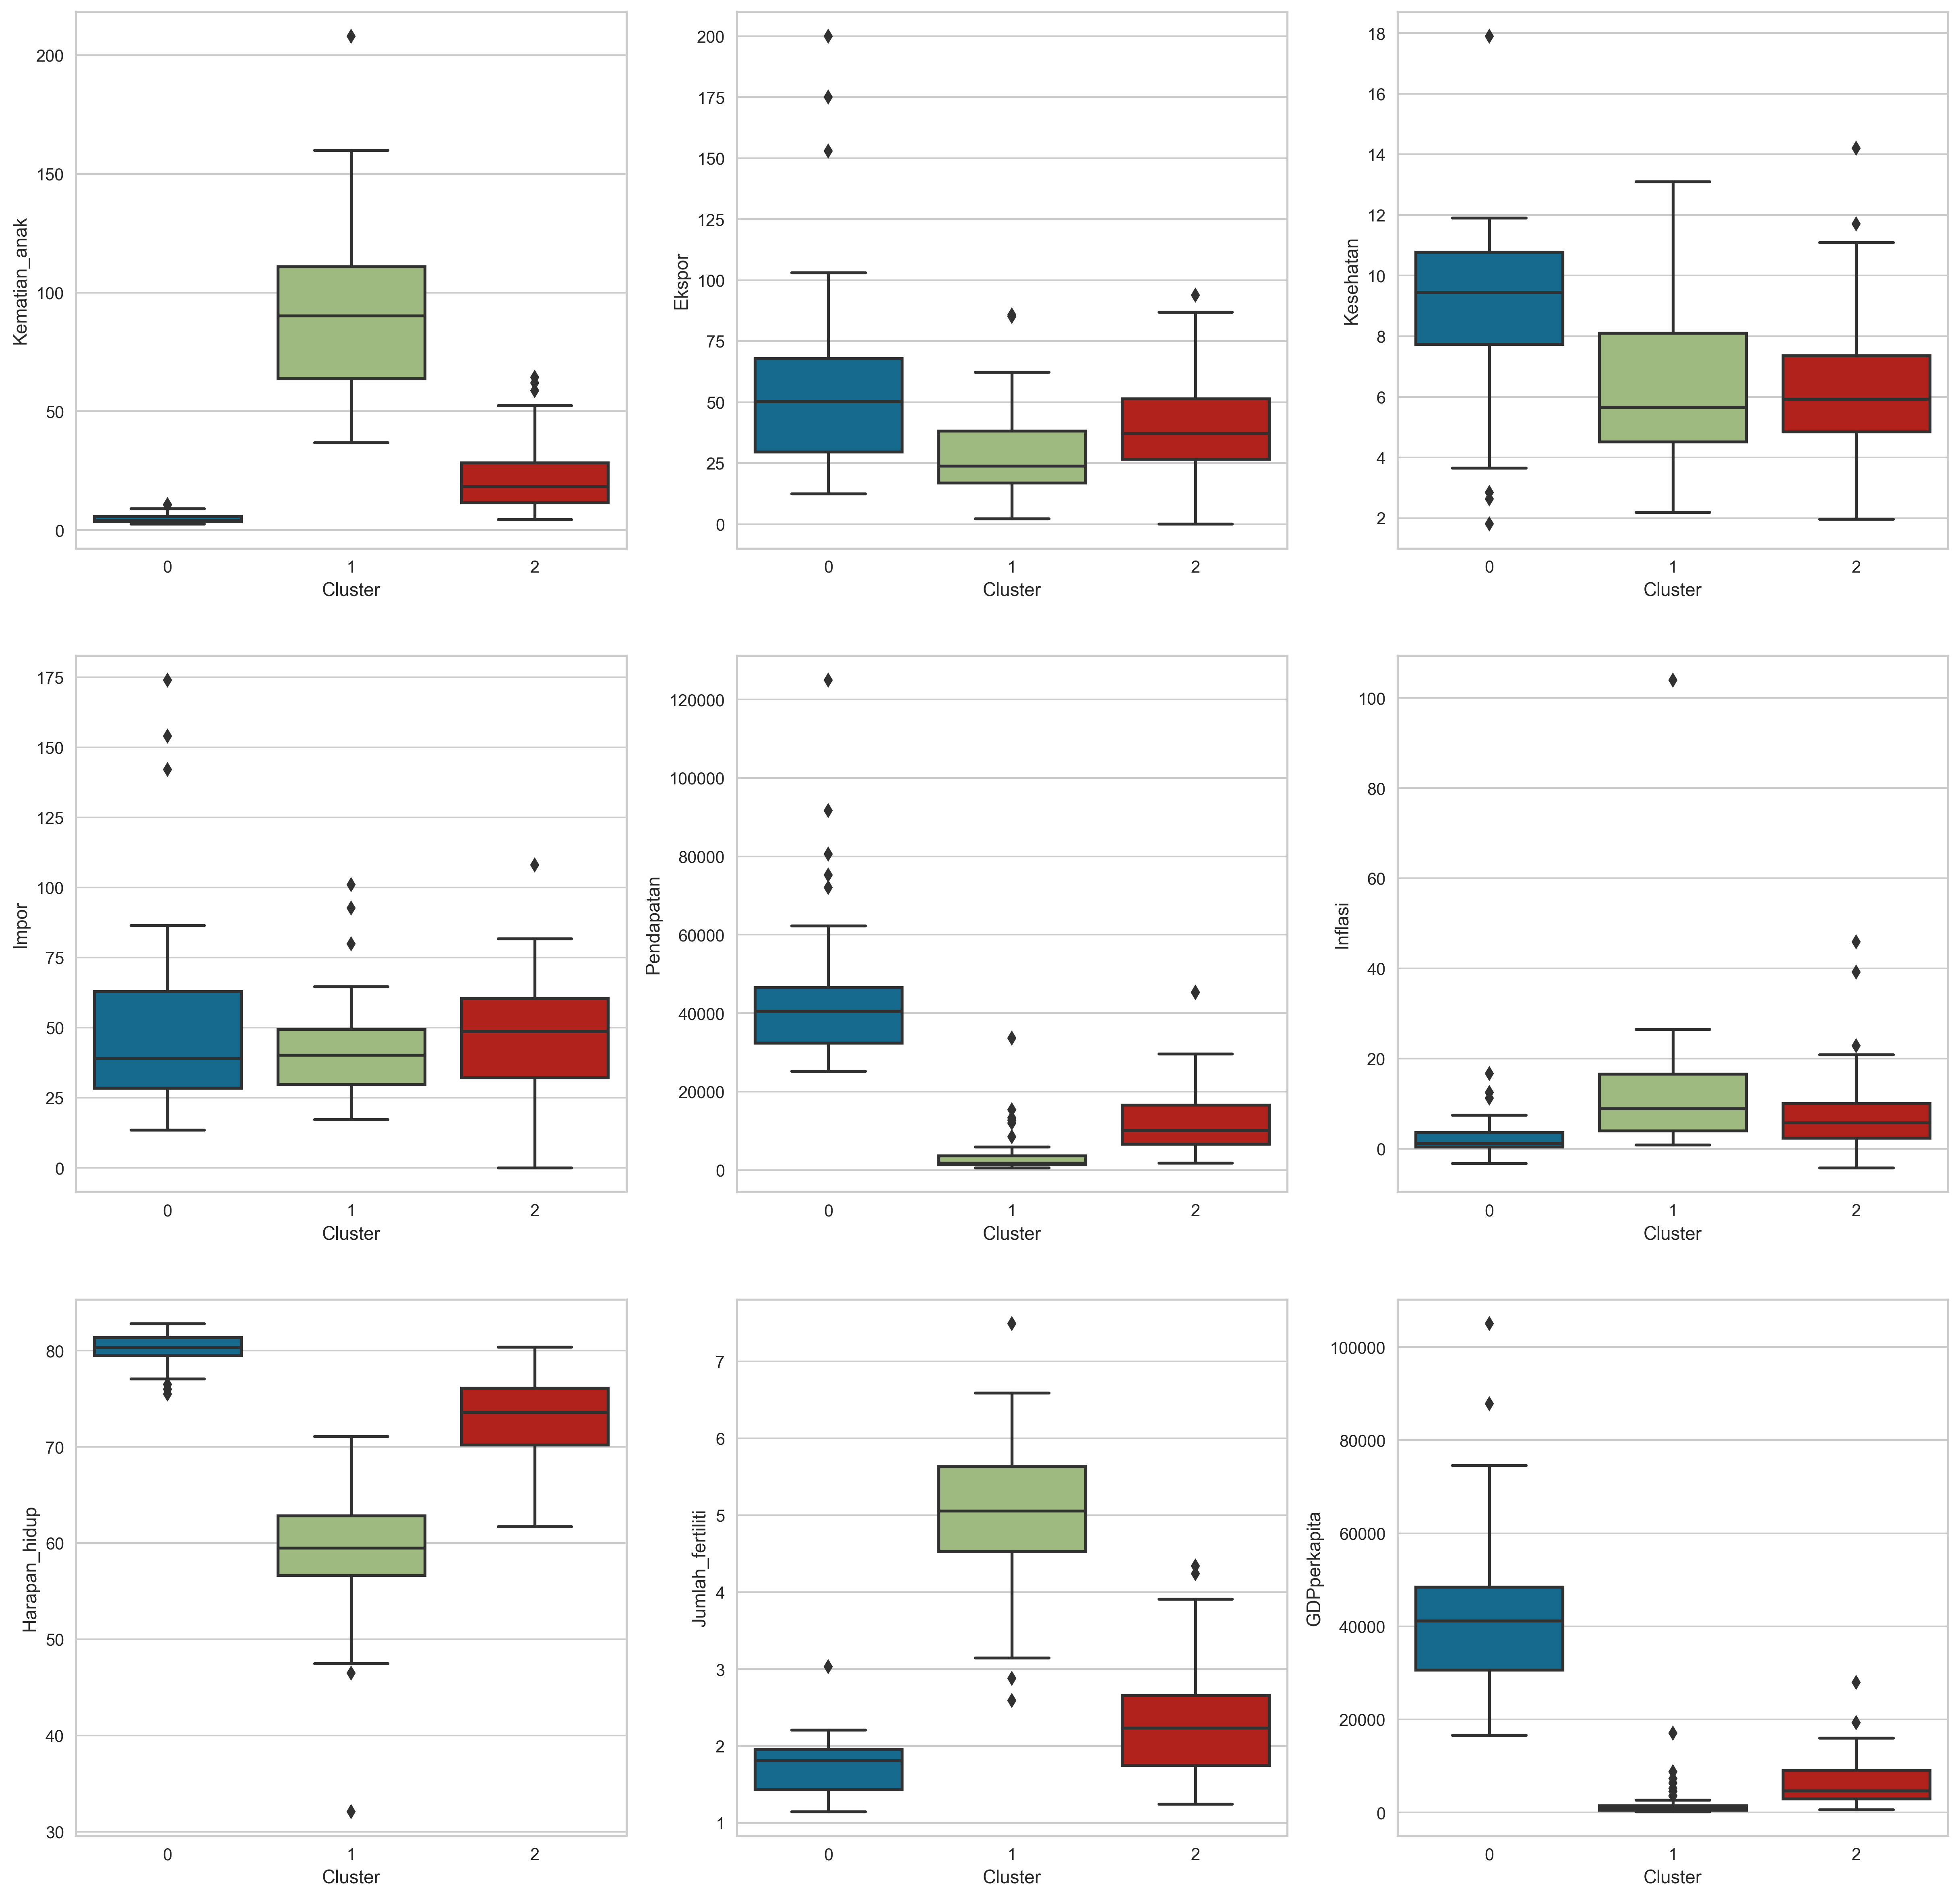

In [46]:
plt.figure(figsize=(20,20))

for i, j in enumerate (df.drop(columns=['Negara','Cluster'])):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Cluster', y=j)

#### Kesimpulan untuk setiap feature

In [61]:
data = {
    'Cluster':[0,1,2],
    'Kematian_anak': ['rendah','tinggi','sedang'],
    'Ekspor': ['tinggi','rendah','sedang'],
    'Kesehatan':['tinggi','sedang','rendah'],
    'Impor':['tinggi','rendah','sedang'],
    'Pendapatan':['tinggi','rendah','sedang'],
    'Inflasi':['rendah','tinggi','sedang'],
    'Harapan_hidup':['tinggi','rendah','sedang'],
    'Jumlah_fertiliti':['rendah','tinggi','sedang'],
    'GDPperkapita':['tinggi','rendah','sedang']
    }

df_ringkasan = pd.DataFrame(data)
df_ringkasan.set_index('Cluster')

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Cluster,,,,,,,,,
0,rendah,tinggi,tinggi,tinggi,tinggi,rendah,tinggi,rendah,tinggi
1,tinggi,rendah,sedang,rendah,rendah,tinggi,rendah,tinggi,rendah
2,sedang,sedang,rendah,sedang,sedang,sedang,sedang,sedang,sedang


by: muhamadsahri08@gmail.com